In [45]:
################# 
#Import necessary package for pandas library 
######################  

import pandas as pd
import numpy as np

################# 
#Import necessary package for scraping 
######################

from bs4 import BeautifulSoup
import requests
from requests import get 
import re

# import get from request to get all the pa
###############################################################
###### Import necessary  library to look on the different page######
#############################################################
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output # Since we’re going to make 72 requests,Our work will look a bit untidy 
                                              #. To avoid that, we’ll clear the output after each iteration
import warnings

###############################################################
###### Import necessary  library to get coordinate from an adress ######
#############################################################

from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter # convert an address into latitude and longitude values

#########################################################################
###### Import necessary library for ploting
##########################################################################

import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
url_home_box='https://www.homebox.fr/garde-meuble-paris.html'# url from homebox
result=requests.get(url_home_box) # Storr the url in the variable result
#result.text[:500] # Show the first 1000 charactère for the link 

In [12]:
soup=BeautifulSoup(result.text, 'html.parser')
#print(soup.prettify()[:500])

In [13]:
#home_box_contains=soup.find_all('div',  class_='required-fields row')
home_box_contains=soup.find_all('div',  class_='coordinates')
home_box_contains1=soup.find_all('div', class_='middle col-sm-6 col-xs-12')
home_box_contains1

[<div class="middle col-sm-6 col-xs-12"><div class="field field-name-field-private-center-node-title field-type-computed field-label-hidden"><div class="field-items"><div class="field-item even"><a class="node-link" href="/stockage-particuliers/location-cave-16m2-paris-rue-de-rivoli"><h2 class="node-title">cave a paris sécurisé et islolé</h2></a><div class="adress">Rue de Rivoli - 75004 Paris</div></div></div></div><div class="field field-name-field-private-space-user-name field-type-computed field-label-hidden"><div class="field-items"><div class="field-item even">
 <div>
 <div class="username">dimytri f.</div>
 </div></div></div></div>
 <div class="group-middle-bottom"><div class="field field-name-body field-type-text-with-summary field-label-hidden"><div class="field-items"><div class="field-item even" property="content:encoded">cave refaite a neuve, sol en béton , électricité et prise électrique, sec.</div></div></div><div class="required-fields group-picto-wrapper field-group-html

### Scraping the HomeBox Webpage

In [14]:
postals=[]
locatites=[]
adresses=[]
votes=[]
ratings=[]

for contain in home_box_contains:
    # Obtains the postal code of the ome box
    postal= contain.find('span', class_ = 'postal-code').text
    
    # Obtain the locality of the product
    localite= contain.find('span', class_ = 'locality').text
    #locatites.append(localite)
    
    # Obtain the complete adresse
    adresse=contain.find('div', class_='thoroughfare').text

    #adresses.append(adresse)
    postals.append('Homebox '+''+adresse +' '+postal+' '+ localite)

for contain1 in home_box_contains1:
    postal1= contain1.find('div', class_ = 'adress').text
    postals.append(postal1)
    
#    Scraping the votes
#   vote_count=contain.find('span', class_='count-vote')
#   ratings.append(vote_count)
# votes.append(votemew)
    
df_home_box = pd.DataFrame({'Postalcode': postals,
#                           'Locality':locatites,
#                           'Adresses':adresses
                           })
#print(test_df.info())
df_home_box = df_home_box[['Postalcode']]
df_home_box

,Postalcode
0,Homebox 11 rue Piccini 75016 Paris
1,Homebox 8 place Boulnois 75017 Paris
2,Homebox 1 rue Jean Lolive 93170 Bagnolet
3,Homebox 12-14 avenue de la République 93170 Ba...
4,Homebox 137-141 avenue Jean Jaurès 93300 Auber...
5,Homebox 157 boulevard de Chanzy 93100 Montreuil
6,Homebox 209 avenue de la République 93800 Epin...
7,Homebox 73 rue Noël Pons 92000 Nanterre
8,Homebox 48 rue de Seine 92700 Colombes
9,Homebox 10 avenue Georges Brassens 94470 Boiss...


In [92]:
for stockage in stockage_homebox:
    url= 'https://www.homebox.fr/'+stockage+'.html'
    print(url)

https://www.homebox.fr/garde-meuble-paris.html
https://www.homebox.fr/garde-meuble-lyon.html
https://www.homebox.fr/garde-meuble-marseille.html


### Scraping more page from Home box

In [131]:
#Declare all the variable
postals=[]
locatites=[]
adresses=[]
votes=[]
ratings=[]

# Preparing the monitoring of the loop
start_time = time()
requests = 0
years_url = [str(i) for i in range(2000,2001)] # Initialisation du paramètre years_url dans la boucle
stockage_homebox=["garde-meuble-paris","garde-meuble-lyon","garde-meuble-marseille","garde-meuble-toulouse","garde-meuble-bordeaux",
                "garde-meuble-nice","garde-meuble-lille","garde-meuble-nantes","garde-meuble-montpellier"]
# For every year in the interval 2000-2017
for year_url in years_url:
# Initialise the for loop for the different page
    for stockage in stockage_homebox:

# Make a get request
        result_home_box_scraping = get('https://www.homebox.fr/'+stockage+'.html')
# Pause the loop
        sleep(randint(8,15))

# Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

# Break the loop if the number of requests is greater than expected
        if requests > 10:
            warn('Number of requests was greater than expected.')
            break
                                       
        soup_home_box_scraping = BeautifulSoup(result_home_box_scraping.text, 'html.parser')
        home_box_contains2= soup_home_box_scraping.find_all('div',  class_='coordinates')
        home_box_contains3=soup_home_box_scraping.find_all('div',  class_='middle col-sm-6 col-xs-12')

 # For every movie of these 50
        for contain in home_box_contains2:
# Obtains the postal code of the ome box
            postal= contain.find('span', class_ = 'postal-code').text

# Obtain the locality of the product
            localite= contain.find('span', class_ = 'locality').text
            #locatites.append(localite)

# Obtain the complete adresse
            adresse=contain.find('div', class_='thoroughfare').text
            #adresses.append(adresse)
        
# Concatenante the parameter adresse + postalt + locatlite
            postals.append('Homebox ; '+''+adresse +' '+postal+' '+ localite)
    
# Obtain the datad form the privat profetionnel
        for contain1 in home_box_contains3:
            postal1= contain1.find('div', class_ = 'adress').text
            postals.append('Privat ;'+ postal1)

            df_home_box = pd.DataFrame({'Postalcode': postals })
            #print(test_df.info())
            df_home_box = df_home_box[['Postalcode']]

Request:9; Frequency: 0.07167003974254811 requests/s


In [132]:
df_home_box

,Postalcode
0,Homebox ; 11 rue Piccini 75016 Paris
1,Homebox ; 8 place Boulnois 75017 Paris
2,Homebox ; 1 rue Jean Lolive 93170 Bagnolet
3,Homebox ; 12-14 avenue de la République 93170 ...
4,Homebox ; 137-141 avenue Jean Jaurès 93300 Aub...
5,Homebox ; 157 boulevard de Chanzy 93100 Montreuil
6,Homebox ; 209 avenue de la République 93800 Ep...
7,Homebox ; 73 rue Noël Pons 92000 Nanterre
8,Homebox ; 48 rue de Seine 92700 Colombes
9,Homebox ; 10 avenue Georges Brassens 94470 Boi...


### Save the datein in the CSV Datei Files

In [3]:
df_home_box.to_csv('homeboxScrapingdata.csv')

In [10]:
# Spleet between Homebox and privat product
df = pd.read_csv('homeboxScrapingdata.csv')
df[['Homeboxyes&no','Postalcode']] = df.Postalcode.str.split(';', expand=True).iloc[:,[0,1]]
df.head()
#df.shape
#df= df['Postalcode']

,Unnamed: 0,Postalcode,Homeboxyes&no
0,0,11 rue Piccini 75016 Paris,Homebox
1,1,8 place Boulnois 75017 Paris,Homebox
2,2,1 rue Jean Lolive 93170 Bagnolet,Homebox
3,3,12-14 avenue de la République 93170 Bagnolet,Homebox
4,4,137-141 avenue Jean Jaurès 93300 Aubervilliers,Homebox


In [98]:
#location = locator.geocode('Champ de Mars, Paris, France')
#print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

### Find the Coordinate on the call Postalcode  

In [17]:
# We create locator that holds the Geocoding service
locator = Nominatim(user_agent='myGeocoder')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

# 2- - create location column
df['location'] = df['Postalcode'].apply(geocode)

# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Rue Saint-Charles - 75015 Paris',), **{}).
Traceback (most recent call last):
  File "/usr/lib/python3.5/urllib/request.py", line 1254, in do_open
    h.request(req.get_method(), req.selector, req.data, headers)
  File "/usr/lib/python3.5/http/client.py", line 1122, in request
    self._send_request(method, url, body, headers)
  File "/usr/lib/python3.5/http/client.py", line 1167, in _send_request
    self.endheaders(body)
  File "/usr/lib/python3.5/http/client.py", line 1118, in endheaders
    self._send_output(message_body)
  File "/usr/lib/python3.5/http/client.py", line 944, in _send_output
    self.send(msg)
  File "/usr/lib/python3.5/http/client.py", line 887, in send
    self.connect()
  File "/usr/lib/python3.5/http/client.py", line 1276, in connect
    server_hostname=server_hostname)
  File "/usr/lib/python3.5/ssl.py", line 377, in wrap_socket
    _context=self)
  File "/usr/lib/python3.5/ssl.py", line 752, in

In [13]:
#Drop all the row  where there is no element
df.dropna(inplace=True)

# 4 - split point column into latitude, longitude and altitude column
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df1=df.drop(['Unnamed: 0','Postalcode','altitude','point','location'], axis=1)
df1[0:2]

### Store df1 in csv file

In [18]:
df1.to_csv('HomeboxCordinate.csv')

##  Scraping the different Foursquare parameters

In [48]:
df2 = pd.read_csv('HomeboxCordinate.csv')
#df2=df2[0:2]
df2=df2.drop(['Unnamed: 0'],axis=1)
df2

,Homeboxyes&no,latitude,longitude
0,Homebox,48.874285,2.284862
1,Homebox,48.879201,2.296046
2,Homebox,48.865592,2.425566
3,Homebox,48.862407,2.416058
4,Homebox,48.906283,2.394877
5,Homebox,48.946740,2.344159
6,Homebox,48.908129,2.228224
7,Homebox,48.922232,2.228808
8,Homebox,48.760260,2.498137
9,Homebox,48.978283,2.235013


In [39]:
LIMIT = 10
radius = 500
CLIENT_ID = '3WGIGW2JP1DAQABSATJENRP25A3THDBEC303QEHM0KPKGKMT'     # your Foursquare ID
CLIENT_SECRET = 'RCOBC0XDX30OHNM402UL5AXMRGHCXZML042LJ2EEERQSRIFW' # your Foursquare Secret
VERSION = '20180605' # Version declaration 
latitudes =  df2['latitude']
longitudes = df2['longitude']
nearby_venues=[]
venues_list = []

# Make a request from Foursquare to get the
for lat, lng in zip(latitudes,longitudes):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        LIMIT)
    url
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for v in results:
# return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'])]) 

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood',
                                 'Neighborhood Latitude',
                                 'Neighborhood Longitude',
                                 'Venue', 
                                 'Venue Latitude',
                                 'Venue Longitude', 
                                 'Venue Category']

In [41]:
nearby_venues[0:2]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,[],48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,[],48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio


#### Store nearby venues in csv files

In [42]:
nearby_venues.to_csv('HomeboxVenues.csv')

In [46]:
df3=pd.read_csv('HomeboxVenues.csv')
df3=df3.drop(['Unnamed: 0', 'Neighborhood'],axis=1)
# Change Name of different Collomns from the Data Frame
df3.columns = ['latitude', 'longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
#df3.shape
df3.head()

,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio
2,48.874285,2.284862,Hotel Residence Foch,48.874246,2.281150,Bed & Breakfast
3,48.874285,2.284862,Jardins de l'Avenue Foch,48.873121,2.287308,Garden
4,48.874285,2.284862,Auberge Dab,48.876717,2.283175,Seafood Restaurant


### Merge df2 and df3 all the datei in one

In [49]:
df_pos = pd.merge(df2, df3, on=['latitude'], how='inner')
df_pos=df_pos.drop(['longitude_x'],axis=1)
df_pos.columns=['HomeboxYesandNo','latitude','longitude','Venue', 'Venue Latitude','Venue Longitude','Venue Category']
df_pos.head()

,HomeboxYesandNo,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Homebox,48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,Homebox,48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio
2,Homebox,48.874285,2.284862,Hotel Residence Foch,48.874246,2.281150,Bed & Breakfast
3,Homebox,48.874285,2.284862,Jardins de l'Avenue Foch,48.873121,2.287308,Garden
4,Homebox,48.874285,2.284862,Auberge Dab,48.876717,2.283175,Seafood Restaurant


In [15]:
df_pos.to_csv('Homeboxwithdifferentvenues.csv')

## Data visualization and pre-processing

In [50]:
df_pos['HomeboxYesandNo'].value_counts()

Privat      1346
Homebox      126
Name: HomeboxYesandNo, dtype: int64

In [126]:
df_pos=pd.read_csv('Homeboxwithdifferentvenues.csv')
df_pos=df_pos.drop(['Unnamed: 0'],axis=1)

#df3=df3.drop(['Unnamed: 0', 'Neighborhood'],axis=1)
df_pos.columns=['HomeboxYesandNo','latitude','longitude','Venue', 'Venue Latitude','Venue Longitude','Venue Category']
df_pos[df_pos.HomeboxYesandNo  != 'Homebox']
df_pos.head()

,HomeboxYesandNo,latitude,longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Homebox,48.874285,2.284862,Le Petit Pergolèse,48.874472,2.282857,French Restaurant
1,Homebox,48.874285,2.284862,Ban Sabai,48.874426,2.284837,Massage Studio
2,Homebox,48.874285,2.284862,Hotel Residence Foch,48.874246,2.281150,Bed & Breakfast
3,Homebox,48.874285,2.284862,Jardins de l'Avenue Foch,48.873121,2.287308,Garden
4,Homebox,48.874285,2.284862,Auberge Dab,48.876717,2.283175,Seafood Restaurant


In [145]:
#define new dataframe with HomeboxYes&No and Venue Categories
df_new=df_pos[['HomeboxYesandNo','Venue Category']]
#f_new[0:5]
df_new['Count']=df_new.sum(axis=1)
#df_new

df_new = df_new.groupby(['HomeboxYesandNo','Venue Category']) ['Count'].count().reset_index()
df_new=df_new[0:68]
df_new1=df_new[68:250]

# Descending order
#df_new_sort=df_new.sort_values(by = 'Count', ascending = False)
df_new_sort1=df_new1.sort_values(by = 'Count', ascending = False)
#df_new
#df_new_sort[0:3]

/home/loth/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [148]:
df_new_sort1=df_new_sort1[0:20]
df_new_sort1

,HomeboxYesandNo,Venue Category,Count
133,Privat,French Restaurant,158
155,Privat,Hotel,108
219,Privat,Shopping Mall,52
82,Privat,Basketball Court,49
80,Privat,Bakery,44
202,Privat,Plaza,42
162,Privat,Italian Restaurant,40
243,Privat,Vegetarian / Vegan Restaurant,33
163,Privat,Japanese Restaurant,30
229,Privat,Supermarket,29


In [149]:
df_new_sort= df_new_sort[0:20]
df_new_sort

,HomeboxYesandNo,Venue Category,Count
36,Homebox,Hotel,15
27,Homebox,French Restaurant,7
24,Homebox,Fast Food Restaurant,6
62,Homebox,Supermarket,5
22,Homebox,Electronics Store,4
49,Homebox,Pizza Place,3
53,Homebox,Restaurant,3
57,Homebox,Shopping Mall,3
17,Homebox,Construction & Landscaping,3
29,Homebox,Furniture / Home Store,3


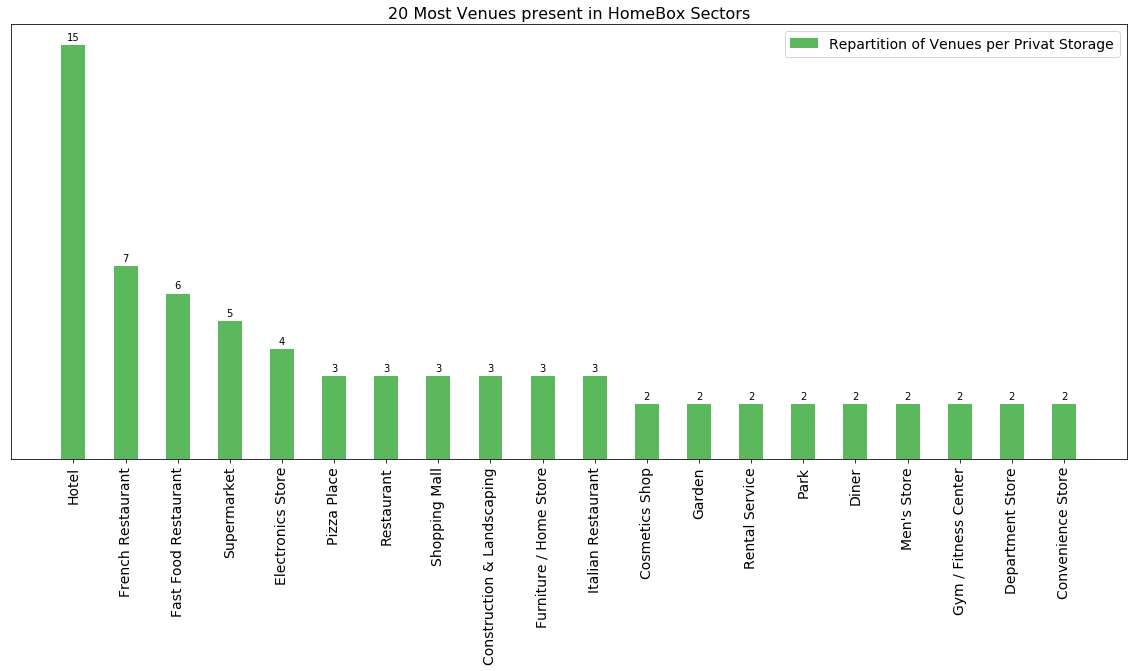

In [166]:
plt.figure(figsize=(20,8))

# the width of the barsRepartition of Venues per Homebox Storage
barWidth = 0.46 

#define bar plots
bars1 = df_new_sort['Count']

#bars2 = df_new_sort1['Count']

# Set position of bar on X axis
#r1 = np.arange(len(bars1))

r1 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#5cb85c', width=barWidth, edgecolor='', label='Repartition of Venues per Privat Storage')

#rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_new_sort['Venue Category'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
#autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('20 Most Venues present in HomeBox Sectors', fontsize=16)

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()
 

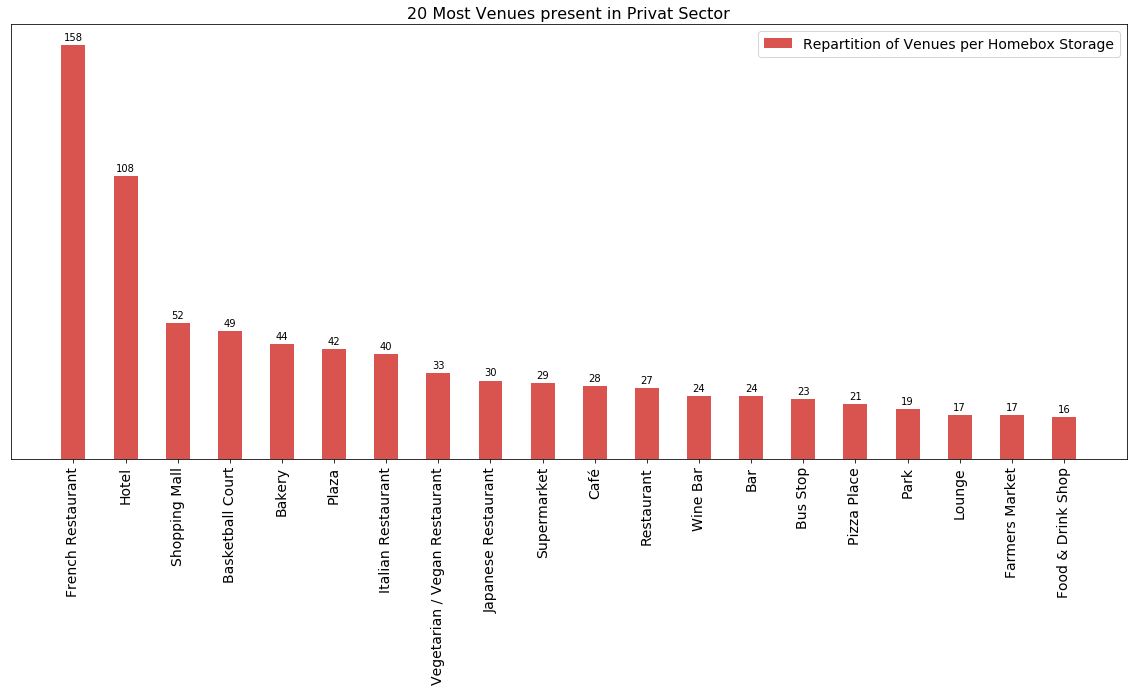

In [168]:
plt.figure(figsize=(20,8))

# the width of the bars
barWidth = 0.46 

#define bar plots
bars1 = df_new_sort1['Count']

#bars2 = df_new_sort1['Count']

# Set position of bar on X axis

#r1 = np.arange(len(bars1))
r1 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]]

# Make the plot  
rects1= plt.bar(r1, bars1, color='#d9534f', width=barWidth, edgecolor='', label='Repartition of Venues per Homebox Storage')

#rects2= plt.bar(r2, bars2, color='#d9534f', width=barWidth, edgecolor='', label='Profitability in %')

#plot x axis values
#plt.xticks([r + barWidth for r in range(len(bars2))], ['Nord-pas-de-calais','Midi-pyrenees','Languedoc-roussillon','Lorraine','Picardie','Bourgogne','Basse-normandie','Champagne-ardenne','Haute-normandie','Ile-de-france','Provence-alpes-cote','Rhone-alpes'], fontsize=14, rotation=90)

plt.xticks([r + barWidth for r in range(len(bars1))], df_new_sort1['Venue Category'], fontsize=14, rotation=90)
#Attach a text label above each bar in *rects*, displaying its height.

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
#autolabel(rects2)

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title('20 Most Venues present in Privat Sector', fontsize=16)

# Plot legeng
plt.legend(fontsize=14)

# How to hide y axis
plt.yticks([])

#fig.tight_layout()
plt.show()
 